# Making Business Decisions Based on Data

Task: You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.

## Part 1: Prioritizing Hypotheses

### Load data

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [4]:
# load in data file 
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

# study general information 
hypotheses.info()

display(hypotheses)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### Apply the ICE framework to prioritize hypotheses

In [5]:
# for each row, apply ICE formula = (impact * confidence) / effort
hypotheses['ICE'] = hypotheses.apply(lambda x: (x['Impact'] * x['Confidence']) / x['Effort'], axis=1)

# sort in descending order
ice_results = hypotheses.sort_values(by='ICE', ascending=False)

display(ice_results)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


### Apply the RICE framework to prioritize hypotheses

In [6]:
# for each row, apply RICE formula = (impact * confidence * reach) / effort
hypotheses['RICE'] = hypotheses.apply(lambda x: (x['Impact'] * x['Confidence'] * x['Reach']) / x['Effort'], axis=1)

# sort in descending order
rice_results = hypotheses.sort_values(by='RICE', ascending=False)

display(rice_results)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


### Show how the prioritization of hypotheses changes when you use RICE instead of ICE

Text(0, 0.5, 'ICE/RICE Score')

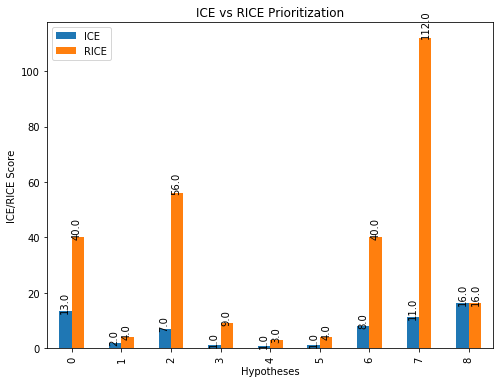

In [9]:
# plot the difference
ax = hypotheses[['Hypothesis','ICE','RICE']].plot(kind='bar',stacked=False, figsize=(8,6))

for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)
    
plt.title('ICE vs RICE Prioritization')
plt.xlabel('Hypotheses')
plt.ylabel('ICE/RICE Score')

The difference between ICE and RICE frameworks is the reach parameter, which estimates how many customers will be reached using polling. This parameters adds another factor to the framework, making RICE scores higher than ICE scores. As such, the RICE framework will be impacted by the reach factor and the RICE score will be skewed accordingly. For example, a hypothesis with a low impact * confidence parameters will be measured differently with a high reach parameter. This can be seen in the data itself: in the ICE results, hypothesis 8 is the highest ranking with impact * confidence being 81. However, in the RICE results hypothesis 8 falls to the fifth highest ranking because its reach parameter is low while, hypothesis 7 (which was third highest ranking in ICE results) climbs to the highest ranking becuase its reach parameter is the highest possible value. 

## Part 1: Prioritizing Hypotheses

### Load data

In [22]:
# load in data file 
orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
orders['date'] = pd.to_datetime(orders['date'])

# study general information 
orders.info()
display(orders.head())

# load in data file 
visits = pd.read_csv('/datasets/visits_us.csv', sep=',')
visits['date'] = pd.to_datetime(visits['date'])

# study general information 
visits.info()
display(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Data Preprocessing

In [36]:
# drop duplicates
orders = orders.drop_duplicates()
visits = visits.drop_duplicates()

# drop any missing values
orders = orders.dropna()
visits = visits.dropna()

### Graph cumulative revenue by group.

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

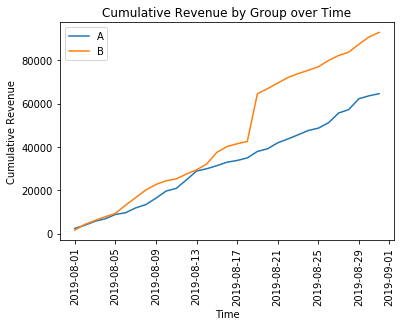

In [38]:
# organize data into groups by date
dateGroups = orders[['date','group']].copy()

# drop any duplicates
dateGroups = dateGroups.drop_duplicates()

# DF with unique paired date and group values from orders DF
ordersAgg = dateGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
#display(ordersAgg)

# DF with unique paired date and group values from visits DF
visitsAgg = dateGroups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
#display(visitsAgg)

#  merge two tables into one 
cumulativeData = ordersAgg.merge(visitsAgg, left_on=['date', 'group'],  right_on=['date','group'])
cumulativeData.columns = ['date','group','orders','buyers','revenue','visitors']
display(cumulativeData)

# cumulative orders and cumulative revenue by day for groups A/B
cumRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue','orders']]
cumRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue','orders']]

# plot cumulative revenue by group
plt.plot(cumRevenueA['date'], cumRevenueA['revenue'], label='A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue'], label='B')
plt.legend()
plt.title('Cumulative Revenue by Group over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Revenue')
plt.xticks(rotation=90)

The cumulative revenue was calculated for both groups A and B, as shown in the graph above. As one can see, the cumulative revenue for both groups increases steadily overtime. However, around August 17 2019, the cumulative revenue of group B had a steap and swift increase from 40,000 dollars to 60,000 dollars and from there kept increasing upward past 80,000 dollars. While the cumulative revenue of group A did keep increasing, it did not see a sudden increase in cumulative revenue in August 17 2019. 

### Graph cumulative average order size by group.

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

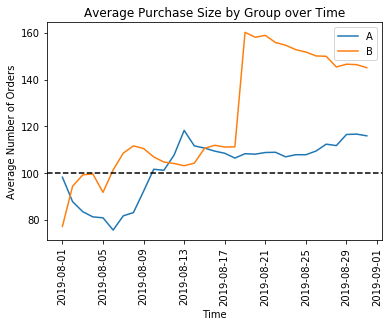

In [44]:
# diving the revenue by the cumulative number of orders
plt.plot(cumRevenueA['date'], cumRevenueA['revenue']/cumRevenueA['orders'], label='A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue']/cumRevenueB['orders'], label='B')

plt.axhline(y=100, color='black', linestyle='--')
plt.legend()
plt.title('Average Purchase Size by Group over Time')
plt.xlabel('Time')
plt.ylabel('Average Number of Orders')
plt.xticks(rotation=90)

The cumulative average order size was calculated for both groups A and B, as shown in the graph above. Previously, we saw that group B has a sudden spike in cumulative revenue around August 17 2019 while group A did not have such increase. From this graph, we can see that the average purchase size was what caused a jump in cumulative revenue for group B. Although average purchase size for both groups is steadily increasing for the month of August 2019, group B sees a sudden jump from around 105 average orders to 160 average orders. After August 17 2019, the average number of orders decreased slowly but this did not affect the cumulative revenue. 

### Graph the relative difference in cumulative average order size for group B compared with group A. 

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

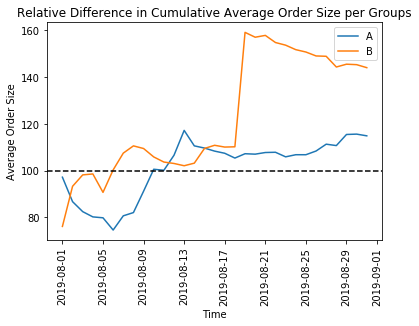

In [43]:
# gather data into one dataframe with group suffixes
mergedCumRevenue = cumRevenueA.merge(cumRevenueB, left_on='date', right_on='date', how='left', suffixes=['A','B'])

plt.plot(mergedCumRevenue['date'], mergedCumRevenue['revenueA'] / mergedCumRevenue['ordersA'] -1, label='A')
plt.plot(mergedCumRevenue['date'], mergedCumRevenue['revenueB'] / mergedCumRevenue['ordersB'] -1, label='B')

plt.axhline(y=100, color='black', linestyle='--')
plt.legend()
plt.title('Relative Difference in Cumulative Average Order Size per Groups')
plt.xlabel('Time')
plt.ylabel('Average Order Size')
plt.xticks(rotation=90)

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. 

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

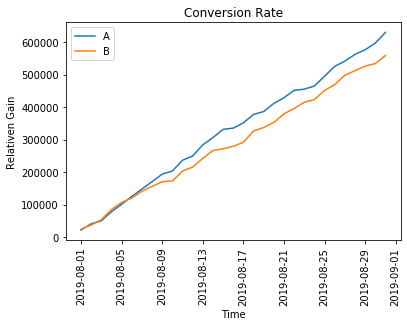

In [55]:
# calculate and store conversion rate
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# select group data
cumDataA = cumulativeData[cumulativeData['group'] == 'A']
cumDataB= cumulativeData[cumulativeData['group'] == 'B']

mergedCumConversion = cumDataA[['date','conversion','visitors']].merge(cumDataB[['date','conversion','visitors']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumConversion['date'], mergedCumConversion['visitorsA']/mergedCumConversion['conversionA'], label='A')
plt.plot(mergedCumConversion['date'], mergedCumConversion['visitorsB']/mergedCumConversion['conversionB'], label='B')

plt.legend()
plt.title('Conversion Rate')
plt.xlabel('Time')
plt.ylabel('Relativen Gain')
plt.xticks(rotation=90)

This graph shows the conversion rates as the ratio of orders to the number of visits each day for each group. As the graph shows, both groups have a linearly increasing conversion rate over time although group A has a greater relative gain than group B. 

### Plot a scatter chart of the number of orders per user. 

Text(0, 0.5, 'Number of Orders')

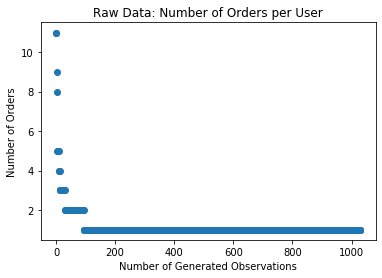

In [60]:
ordersByUsers = orders.copy()

# drop unneccessary columns and group the orders by users
ordersByUsers= ordersByUsers.drop(['group','revenue','date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsers.columns = ['userId', 'orders']

# sort data by number of orders in descending orders
ordersByUsers = ordersByUsers.sort_values(by='orders', ascending=False)

# find values for horizontal axis by the number of generated observations 
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Raw Data: Number of Orders per User')
plt.xlabel('Number of Generated Observations')
plt.ylabel('Number of Orders')


This scatter plot shows the number of orders per users using the raw data with anomalies. As one can see, the number of orders per user is mostly 1-2 orders. Very few users order above 3 or 4 units.

### Calculate the 95th and 99th percentiles for the number of orders per user. 

In [59]:
print(np.percentile(ordersByUsers['orders'], [95,99]))

[2. 4.]


With percentiles, we can determine the value below which n percent of observations fall. As we can see, 95% of the observations are within 2 orders per user and 99% of obercations are within 4 orders per user. We can define the point at which the data value becomes an anomaly as any observation where the number of orders is greater than 4 orders.

### Plot a scatter chart of order prices.

Text(0, 0.5, 'Revenue per Order')

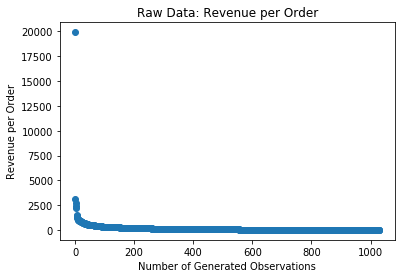

In [61]:
ordersByPrices = orders.copy()

# drop unneccessary columns and group the orders by users
ordersByPrices= ordersByPrices.drop(['group','transactionId','date'], axis=1).groupby('visitorId', as_index=False).agg({'revenue':'sum'})
ordersByPrices.columns = ['userId', 'revenue']

# sort data by number of orders in descending orders
ordersByPrices = ordersByPrices.sort_values(by='revenue', ascending=False)

# find values for horizontal axis by the number of generated observations 
x_values = pd.Series(range(0, len(ordersByPrices)))

plt.scatter(x_values, ordersByPrices['revenue'])

plt.title('Raw Data: Revenue per Order')
plt.xlabel('Number of Generated Observations')
plt.ylabel('Revenue per Order')

This scatter plot shows the revenue per order using raw data with possible anomalies. As one can see, the revenue per order is mostly before 2500 dollars. Very few orders have revenue above 2500 dollars.

### Calculate the 95th and 99th percentiles of order prices. 

In [62]:
print(np.percentile(ordersByPrices['revenue'], [95,99]))

[ 510.35 1047.24]


With percentiles, we can determine the value below which n percent of observations fall. As we can see, 95% of the observations are within 510 dollars per order and 99% of obercations are within 1000 dollars per order. We can define the point at which the data value becomes an anomaly as any observation where the revenue is greater than 500 dollars.

### Find the statistical significance of the difference in conversion between the groups using the raw data. 

In [64]:
# calculate statistical significance of difference in conversion between groups 
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

# delcare vars with users from different groups and the number of users / group
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

p_value = st.mannwhitneyu(sampleA, sampleB)[1]
print(p_value)

alpha = 0.05

if p_value < alpha:
    print('H0 rejected')
else:
    print('Failed to reject H0')

0.010228056074175523
H0 rejected


We want to test the statistical significance of the difference in conversion between groups A and B. This can be done using the Mann-Wilcoxon-Whitney non-parametric test which ranks two samples in ascending order and compares the ranks of the values that appears in both samples. If the differences between their ranks are the same from sample to sample, it means the shirt is typical (some values were added, causing the rest of the values to shift). On the other hand, a non-typical shift means a real change occurred and the sum of such shifts in rank if the value of the criterion

Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B.
Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B. 

The p_value of 0.01 is less than the alpha level of 0.05 which means we can reject the null hypothesis and determine the difference between the conversion rate of groups A and B is statistically significant. This means there is a non-typical shift in the data. 

### Find the statistical significance of the difference in average order size between the groups using the raw data. 

In [65]:
p_value = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]
print("{0:.3f}".format(p_value))
alpha = 0.05

if p_value < alpha:
    print('H0 rejected')
else:
    print('Failed to reject H0')

0.346
Failed to reject H0


We want to test the statistical significance of the difference in average order size between groups A and B. This can be done using the Mann-Wilcoxon-Whitney non-parametric test which ranks two samples in ascending order and compares the ranks of the values that appears in both samples. If the differences between their ranks are the same from sample to sample, it means the shift is typical (some values were added, causing the rest of the values to shift). On the other hand, a non-typical shift means a real change occurred and the sum of such shifts in rank if the value of the criterion

Null Hypothesis H0: There is no statistically significant difference in average order size between groups A and B.
Alternative Hypothesis H1: There is a statistically significant difference in average order size between groups A and B. 

The p_value of 0.35 is greater than than the alpha level of 0.05 which means we can cannnot reject to the null  hypothesis and cannot make any conclusions about the difference in average order size. Additionally, it means there is a typical shift in the data. 

### Find the statistical significance of the difference in conversion between the groups using the filtered data. 

In [66]:
#identify anomalous users with tooo many orders
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)

# identify anomalous users with expensive orders
usersWithExpensiveOrders = orders[orders['revenue'] > 500]['visitorId']

# join them into abnormal table and remove dupliated
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

# calculate statistical signifiacne of the difference in conversion between groups using filtered data
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("{0:.5f}".format(p_value))

alpha = 0.05

if p_value < alpha:
    print('H0 rejected')
else:
    print('Failed to reject H0')

0.00529
H0 rejected


The raw data was filtered by two criterion, the number of orders and the revenue per order. As previously determined, 95% of users make 2 orders and the average revenue per order is about 500 dollars. We can filter the data such that we only have rows with 2 or less orders and that have a revenue of 500 dollars of less. 

Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B.
Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B. 

The p_value of 0.005 is still less than the alpha level of 0.05 which means we can reject the null hypothesis and determine the difference between the conversion rate of groups A and B is statistically significant. This means there is a non-typical shift in the data. 

### Find the statistical significance of the difference in average order size between the groups using the filtered data.

In [68]:
p_value = st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]
print("{0:.3f}".format(p_value))

alpha = 0.05

if p_value < alpha:
    print('H0 rejected')
else:
    print('Failed to reject H0')

Failed to reject H0
0.455


The raw data was filtered by two criterion, the number of orders and the revenue per order. As previously determined, 95% of users make 2 orders and the average revenue per order is about 500 dollars. We can filter the data such that we only have rows with 2 or less orders and that have a revenue of 500 dollars of less. 

Null Hypothesis H0: There is no statistically significant difference in average order size between groups A and B.
Alternative Hypothesis H1: There is a statistically significant difference in average order size between groups A and B. 

The p_value of 0.35 is greater than than the alpha level of 0.05 which means we can cannnot reject to the null  hypothesis and cannot make any conclusions about the difference in average order size. Additionally, it means there is a typical shift in the data. 

### Make a decision based on the test results. 

From the above calculations and graphs, it is safe to make a data-driven recommendation to marketing specialists that group B is the better group in which in invest resources. They generate greater cumulative revenue and have higher average order sizes. 